In [1]:
import numpy as np
import pandas as pd
from scripts.embeddings.preprocessing import prepare_words, to_set, prepare_sentences
from scripts.embeddings.tfidf import get_matrix
from scripts.clustering.kmeans import Kmeans
from sentence_transformers import SentenceTransformer
from umap import UMAP

Downloading: 100%|██████████| 1.18k/1.18k [00:00<?, ?B/s]
Downloading: 100%|██████████| 116/116 [00:00<?, ?B/s] 
Downloading: 100%|██████████| 3.15M/3.15M [00:00<00:00, 4.97MB/s]
Downloading: 100%|██████████| 2.00k/2.00k [00:00<?, ?B/s]
Downloading: 100%|██████████| 1.39k/1.39k [00:00<00:00, 173kB/s]
Downloading: 100%|██████████| 461/461 [00:00<?, ?B/s] 
Downloading: 100%|██████████| 2.48G/2.48G [00:46<00:00, 53.8MB/s]
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 6.63kB/s]
Downloading: 100%|██████████| 1.79k/1.79k [00:00<?, ?B/s]
Downloading: 100%|██████████| 792k/792k [00:00<00:00, 2.57MB/s]
Downloading: 100%|██████████| 1.39M/1.39M [00:01<00:00, 1.10MB/s]
Downloading: 100%|██████████| 1.92k/1.92k [00:00<00:00, 240kB/s]


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters
Fit 21 clusters
Fit 22 clusters
Fit 23 clusters
Fit 24 clusters
Fit 25 clusters
Fit 26 clusters
Fit 27 clusters
Fit 28 clusters
Fit 29 clusters
Fit 30 clusters
Fit 31 clusters
Fit 32 clusters
Fit 33 clusters
Fit 34 clusters
Fit 35 clusters
Fit 36 clusters
Fit 37 clusters
Fit 38 clusters
Fit 39 clusters
Fit 40 clusters
Fit 41 clusters
Fit 42 clusters
Fit 43 clusters
Fit 44 clusters
Fit 45 clusters
Fit 46 clusters
Fit 47 clusters
Fit 48 clusters
Fit 49 clusters
Fit 50 clusters


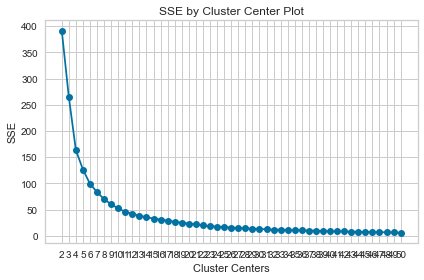

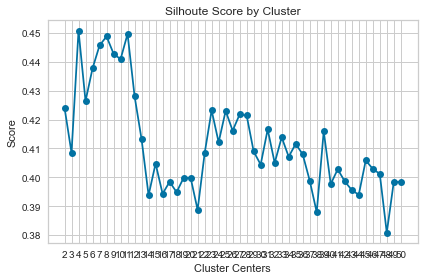

In [11]:
model = SentenceTransformer('sentence-t5-xl')
#Our sentences we like to encode
recs = pd.read_csv("data/Recommendations.csv")
uniq = recs["Recommendation"].unique()

#Sentences are encoded by calling model.encode()
embeddings = model.encode(uniq)

umap = UMAP()
umap_embeddings = umap.fit_transform(embeddings)

Kmeans(umap_embeddings).find_k(50)

In [15]:
from top2vec import Top2Vec
model = Top2Vec(uniq, embedding_model='sentence-t5-xl', min_count = 3)

ValueError: sentence-t5-xl is an invalid embedding model.

In [13]:
model.get_num_topics()

2

In [14]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
documents

array(['Create crisis communication plan with B2B',
       'Make influencors part of certain crisis communication strategies.',
       'Outsource crisis communication to crisis team',
       'Create clear guidelines for building crisis communication organization and implement them',
       'Clear guidelines for crisis communication'], dtype=object)

In [6]:
topic_words, word_scores, topic_nums = model.get_topics(2)
word_scores

array([[0.3334869 , 0.25635388, 0.20465499, 0.19472954, 0.1894603 ,
        0.17970088, 0.17744477, 0.1771557 , 0.16742894, 0.15904844,
        0.15822229, 0.15206923, 0.15093197, 0.13089733, 0.11928789,
        0.11518958, 0.11467044, 0.11427426, 0.11407684, 0.09717806,
        0.09664351, 0.08736519, 0.08220816, 0.07938585, 0.07816403,
        0.07789354, 0.07550772, 0.0750867 , 0.07359526, 0.0699066 ,
        0.06249446, 0.05973355, 0.0580412 , 0.0542185 , 0.05260552,
        0.0505548 , 0.04934304, 0.04874942, 0.04862606, 0.04773083,
        0.04651769, 0.0440731 , 0.04380067, 0.04094016, 0.04079589,
        0.03991532, 0.0387045 , 0.03673387, 0.03669178, 0.03412585],
       [0.4521262 , 0.43271422, 0.38420296, 0.28420597, 0.20810005,
        0.20183316, 0.15983975, 0.15453401, 0.14299591, 0.13769974,
        0.12324914, 0.11082592, 0.10918504, 0.10075246, 0.09195365,
        0.08617493, 0.07940932, 0.07395069, 0.0739325 , 0.07359102,
        0.06486547, 0.05584544, 0.04970929, 0.0